# Problem Set 1
## UCSF NS248, Winter 2023

### Streamlined solutions by Max Collard

---

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tqdm lets you make really easy progress bars!
from tqdm import tqdm

---

## Problem 1

In [2]:
# Probability of A and B independently firing
pA = 0.1
pB = 0.4

# Conditional probabilities for C
# Here I'm encoding them as a `dict` whose keys are tuples of the form (A, B)
pC_cond = {
    (False, False): 0.,
    (True, False): 0.5,
    (False, True): 0.2,
    (True, True): 1.
}

In [3]:
pC = ( pC_cond[(True, True)] * pA * pB
       + pC_cond[(True, False)] * pA * (1 - pB)
       + pC_cond[(False, True)] * (1 - pA) * pB
       + pC_cond[(False, False)] * (1 - pA) * (1 - pB) )

pC_A = ( pC_cond[(True, True)] * pB
         + pC_cond[(True, False)] * (1 - pB) )

pC_B = ( pC_cond[(True, True)] * pA
         + pC_cond[(False, True)] * (1 - pA) )

theoretical_values = {
    # Pr(A | C)
    '1a': (pC_A * pA) / pC,
    # Pr(B | C)
    '1b': (pC_B * pB) / pC,
    # Pr(A & B | C)
    '1c': (pC_cond[(True, True)] * pA * pB) / pC,
    # Pr(A & ~B | C)
    '1d': (pC_cond[(True, False)] * pA * (1 - pB)) / pC,
    # Pr(~A & B | C)
    '1e': (pC_cond[(False, True)] * (1 - pA) * pB) / pC,
}

In [26]:
for problem in sorted( theoretical_values.keys() ):
    print( f'{problem}: {theoretical_values[problem]}' )

1a: 0.49295774647887314
1b: 0.7887323943661972
1c: 0.28169014084507044
1d: 0.21126760563380279
1e: 0.5070422535211268


---

## Problem 2

### Parameters

In [4]:
# These are the numbers of runs per simulation we're asked to do
ns_per_sim = [
    1,
    10,
    100,
    1000,
    10000,
    100000,
]

### Implementation

#### Simulation

In [5]:
def random_fire( p ):
    """A r.v. that is True with probability `p`"""
    if np.random.uniform() < p:
        return True
    else:
        return False

def simulate( n ):
    """Simulate `n` runs of Problem 2 (loop implementation)"""
    
    # Preallocate the structure to hold the results
    ret = {
        'A': [],
        'B': [],
        'C': [],
    }
    
    # For each run ...
    for i in range( n ):
        
        # Determine if A and B fired
        fired_a = random_fire( pA )
        fired_b = random_fire( pB )
        
        # Determine the appropriate threshold for C
        pC = pC_cond[(fired_a, fired_b)]
        # Determine if C fired
        fired_c = random_fire( pC )
        
        # Add this run's data to our results
        ret['A'].append( fired_a )
        ret['B'].append( fired_b )
        ret['C'].append( fired_c )
    
    # For convenience, transform the return values into `numpy` arrays
    ret = { k: np.array( v )
            for k, v in ret.items() }
    
    return ret

#### Evaluation

In [6]:
def pr( xs, given = None ):
    """The probability that `xs` is true
    
    If `given` is not None, condition on `given`.
    """
    
    if xs.size == 0:
        # Probability on an empty space is undefined
        return np.nan
    
    if given is None:
        return np.sum( xs == True ) / xs.size
    
    # `given` is now not None
    
    if xs[given].size == 0:
        # Conditional probability conditioned on a set of measure zero is
        # undefined in the discrete case
        return np.nan
    
    return np.sum( xs[given] == True ) / xs[given].size

def evaluate( data ):
    """Evaluate Problem 2 simulation results to compute the values for each question"""
    
    # Our return value
    ret = dict()
    
    # 1a: Pr( A | C )
    ret['1a'] = pr( data['A'], given = data['C'] )
    # 1b: Pr( B | C )
    ret['1b'] = pr( data['B'], given = data['C'] )
    # 1c: Pr( A & B | C )
    ret['1c'] = pr( data['A'] & data['B'], given = data['C'] )
    # 1d: Pr( A & not-B | C )
    ret['1d'] = pr( data['A'] & ~data['B'], given = data['C'] )
    # 1e: Pr( B & not-A | C )
    ret['1e'] = pr( data['B'] & ~data['A'], given = data['C'] )
    
    return ret

#### Plotting

In [7]:
def plot( ax, results,
          theoretical = None ):
    """Plot results for one part of Problem 2
    
    Results is a `dict` of the form {n: r} where `n` is the number
    of simulation runs used, and each `r` is the result
    """
    
    # Extract the n-values used in results
    ns = np.array( list( sorted( results.keys() ) ) )
    plot_values = np.array( [ results[n]
                              for n in ns ] )
    
    # `semilogx` puts the x-axis on a log10 scale
    ax.semilogx( ns, plot_values, 'k-',
                 linewidth = 2 )
    
    if theoretical is not None:
        # Let's also plot a line with the theoretical value
        ax.semilogx( ns, theoretical * np.ones( ns.shape ), 'k--',
                     linewidth = 1 )

Let's see what these outputs look like:

In [33]:
simulate( 1 )

{'A': array([False]), 'B': array([False]), 'C': array([False])}

In [34]:
evaluate( simulate( 10 ) )

{'1a': 1.0, '1b': 0.5, '1c': 0.5, '1d': 0.5, '1e': 0.0}

### Run

#### Simulate

In [8]:
results = dict()

# For each possible number of runs
for n in ns_per_sim:
    # Run the simulation
    data = simulate( n )
    # Evaluate the results
    results[n] = evaluate( data )

#### Plot

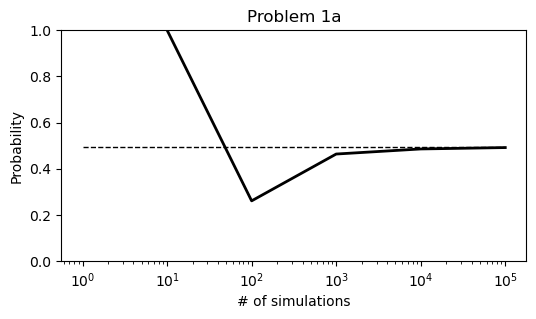

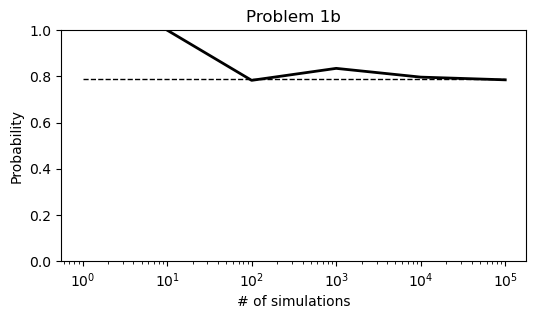

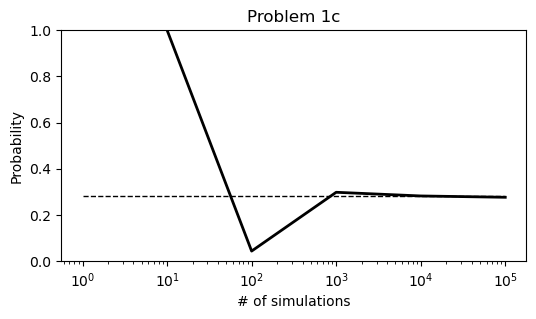

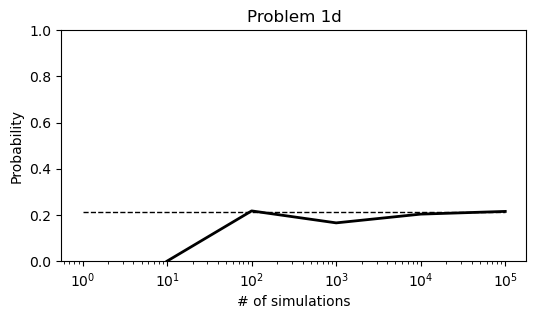

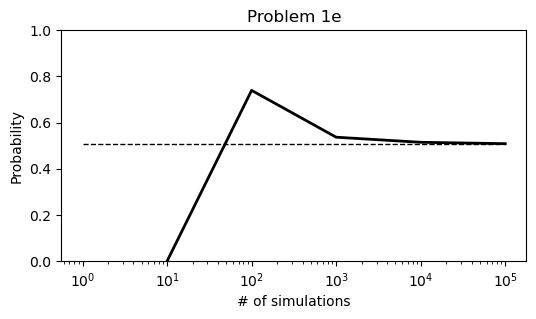

In [9]:
# Get all of the problems from the first set of results
problems = list( sorted( results[ns_per_sim[0]].keys() ) )

for problem in problems:
    
    # Reformat the results to pull out only the data for the current problem
    results_problem = { n: results[n][problem]
                        for n in ns_per_sim }
    
    # This instantiates an axes object that we can draw inside of
    figure, ax = plt.subplots( figsize = (6, 3) )
        
    # Execute our plotting code inside of those axes
    plot( ax, results_problem,
          theoretical = theoretical_values[problem] )
    
    # Some extra formatting pizzazz 
    ax.set_ylim( 0, 1 )
    ax.set_title( f'Problem {problem}' )
    ax.set_xlabel( '# of simulations' )
    ax.set_ylabel( 'Probability' )
    
    # This tells `matplotlib` to actually draw the figure image
    plt.show()

---

## Problem 3

In [35]:
# Never, EVER use raw path separators ('/' or '\') in your code.
# They are *platform-dependent*: '/' for Unix, '\' for Windows.
# Always instead use the language-specific implementation of path joining.

data_dir = 'data'
data_filename = 'PS1_Problem3_Data.txt'
data_path = os.path.join( data_dir, data_filename )

In [36]:
print( data_path )

data/PS1_Problem3_Data.txt


In [37]:
data = pd.read_csv( data_path,
                    sep = '\t',
                    names = ['stimulus', 'spikes'] )

In [38]:
data

,stimulus,spikes
0,1,34
1,2,54
2,1,37
3,2,42
4,1,30
...,...,...
395,2,49
396,1,29
397,2,44
398,1,44


In [39]:
# Let's just hold on to our data as `numpy` arrays
stimulus = np.array( data['stimulus'] )
spikes = np.array( data['spikes'] )

### 3a

In [11]:
def plot_hists( ax, hists, bin_edges ):
    """Plot a `dict` of histograms as returned by `numpy.histogram` inside `ax`"""
    
    # Center is the average of the left and right edge
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    # Width is the right edge minus the left edge
    bin_widths = bin_edges[1:] - bin_edges[:-1]
    
    # Determine a transparency value that lets all stimuli be visible
    alpha = 1. / len( hists.keys() )
    
    # * `enumerate` turns your for loop into something like `(i, x)`, where `x` is the
    # thing that you want to iterate over, and `i` is an index variable that starts at
    # 0 and counts up
    # * `dict.items()` iterates over all `(key, value)` pairs in a `dict`
    # 
    # So this line iterates over
    #    (i, (k, v))
    # where `i` counts up from 0, `k` is the key from `hists`, and `v` is the value
    # from `hists`
    for i_stimulus, (stimulus, counts) in enumerate( hists.items() ):
        ax.bar( bin_centers, counts, width = bin_widths,
                color = f'C{i_stimulus%10}', # There are only 10 colors, so we have to do modulo 10
                alpha = alpha,
                label = f'Stimulus {stimulus}' )
        
    ax.legend()
    ax.set_xlabel( 'Spikes' )
    ax.set_ylabel( 'Count' )

In [12]:
# `list( set( ... ) )` is a shortcut for getting the unique values of something
stimuli = list( sorted( set( stimulus ) ) )
max_spikes = np.max( spikes )

In [13]:
# This makes bins centered on integers (i.e., with boundaries at every 0.5)
bin_edges = np.arange( 0, max_spikes + 1 ) - 0.5
# * `numpy.histogram` returns two values, the counts and the bin edges, so we only want the first one
# * `{ s: f(s) for s in stimuli }` makes a new `dict` where each member of `stimuli` is used to make one
#   ke-value pair: the key is `s`, and the value is `f(s)`
hists = { s: np.histogram( spikes[stimulus == s], bins = bin_edges )[0]
          for s in stimuli }

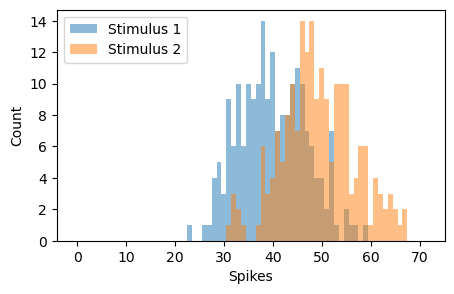

In [14]:
fig, ax = plt.subplots( figsize = (5, 3) )
# Run our plotting function inside of the axes
plot_hists( ax, hists, bin_edges )
plt.show()

### 3b

In [15]:
bin_width = 5.
bin_edges = np.arange( 0, max_spikes + bin_width, bin_width )
hists = { s: np.histogram( spikes[stimulus == s], bins = bin_edges )[0]
          for s in stimuli }

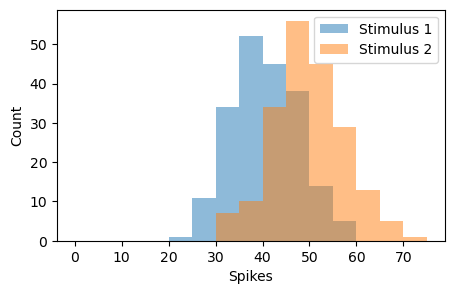

In [16]:
fig, ax = plt.subplots( figsize = (5, 3) )
plot_hists( ax, hists, bin_edges )
plt.show()

### 3c

In [17]:
def pmf( counts ):
    """Normalize `counts` into a pmf"""
    return counts / np.sum( counts )

def cdf( data, xs ):
    """Compute the cdf of `data`, evaluated at `xs`"""
    n = len( data )
    return np.array( [ np.sum( data <= x ) / n
                       for x in xs ] )

def plot_pmfs( ax, pmfs, xs ):
    """Plot a `dict` of pmfs as returned by `pmf`, with x-values specified by `xs`"""
    
    # This is the same (i, (k, v)) iterator from before!
    for i_stimulus, (stimulus, cur_pmf) in enumerate( pmfs.items() ):
        ax.stem( xs + 0.1 * i_stimulus, cur_pmf, f'C{i_stimulus%10}',
                 label = f'Stimulus {stimulus}' )
    
    ax.legend()
    ax.set_xlabel( 'Spikes' )
    ax.set_ylabel( 'Probability' )
        
def plot_cdfs( ax, cdfs, xs ):
    """Plot a `dict` of cdfs as returned by `cdf`, with x-values specified by `xs`"""
    
    # This is the same (i, (k, v)) iterator from before!
    for i_stimulus, (stimulus, cur_cdf) in enumerate( cdfs.items() ):
        ax.plot( xs, cur_cdf, f'C{i_stimulus%10}-',
                 label = f'Stimulus {stimulus}' )
        
    ax.legend()
    ax.set_xlabel( 'Spikes' )
    ax.set_ylabel( 'Cumulative probability' )

In [18]:
bin_edges = np.arange( 0, max_spikes + 1 ) - 0.5
# The cdf is defined at any value of x, so let's evaluate it on a relatively tight lattice
# for visualization purposes
xs_cdf = np.arange( 0, max_spikes + 10., 0.1 )

hists = { s: np.histogram( spikes[stimulus == s], bins = bin_edges )[0]
          for s in stimuli }

# This iterates over (key, value) pairs in `hists` to form a new dictionary
# with key `s` (the key from `hists`) and value `pmf( counts )` (where `counts` is the
# value from `hists`)
pmfs = { s: pmf( counts )
         for s, counts in hists.items() }

# The cdf of each stimulus is made by filtering for the spikes that occurred for a
# give nstimulus
cdfs = { s: cdf( spikes[stimulus == s], xs_cdf )
         for s in stimuli }

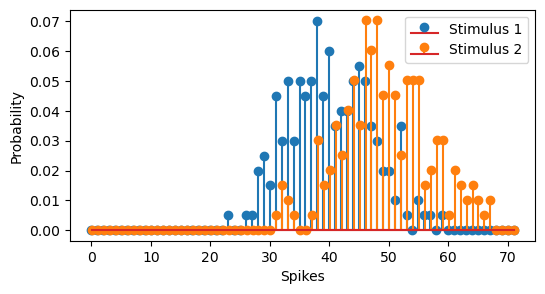

In [19]:
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

fig, ax = plt.subplots( figsize = (6, 3) )
plot_pmfs( ax, pmfs, bin_centers )
plt.show()

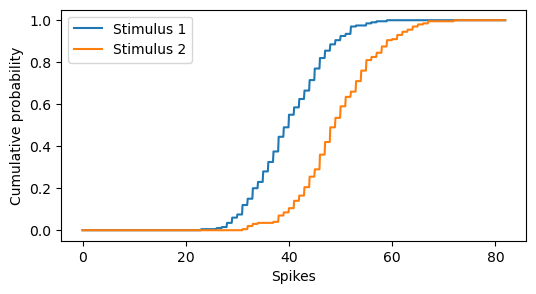

In [20]:
fig, ax = plt.subplots( figsize = (6, 3) )
plot_cdfs( ax, cdfs, xs_cdf )
plt.show()

### 3d

In [21]:
def uniform_prior( stimuli ):
    """A prior distribution that is uniform across all `stimuli`"""
    n = len( stimuli )
    return { s: 1. / n
             for s in stimuli }

def bayes( pmfs, prior = None ):
    """Apply Bayes' rule for the given dicts specifying the likelihood (`pmfs`) and `prior`"""
    
    # Shortcut for referencing the stimuli (keys of `pmfs`)
    stimuli = list( pmfs.keys() )
    
    if prior is None:
        # Default prior is uninformative
        prior = uniform_prior( stimuli )
    
    # Ensure that pmfs are the same shape
    n = len( pmfs[stimuli[0]] )
    for stimulus, cur_pmf in pmfs.items():
        if len( cur_pmf ) != n:
            raise ValueError( 'Malformed pmfs' )
    
    # Use the law of total probability to get the denominator for each spike count
    denominators = np.zeros( (n,) )
    for i in range( n ):
        denominators[i] = np.sum( np.array( [ pmfs[s][i] * prior[s]
                                              for s in stimuli ] ) )
    
    # Apply Bayes' rule at each point
    # (If the denominator is 0, then Bayes' rule is undefined here)
    posteriors = { s: (pmfs[s] * prior[s]) / denominators
                   for s in stimuli }
    
    return posteriors

def get_estimator( bin_edges, posteriors ):
    """Returns a function that evaluates the binned posterior from `bayes` using the nearest value"""
    
    def f( x ):
        # `i` is the first index at which `x` is within the left and right bin edges
        i = np.where( (x >= bin_edges[:-1]) & (x < bin_edges[1:]) )[0][0]
        return { s: posterior[i]
                 for s, posterior in posteriors.items() }
    
    return f

In [22]:
bin_edges = np.arange( 0, max_spikes + 1 ) - 0.5
hists = { s: np.histogram( spikes[stimulus == s], bins = bin_edges )[0]
          for s in stimuli }

pmfs = { s: pmf( counts )
         for s, counts in hists.items() }

posteriors = bayes( pmfs )

estimator = get_estimator( bin_edges, posteriors )

/var/folders/0l/tm93kmls3sl0kh9w6zw5r7r40000gn/T/ipykernel_57133/3257477840.py:28: RuntimeWarning: invalid value encountered in divide
  posteriors = { s: (pmfs[s] * prior[s]) / denominators


In [23]:
estimator( 52 )

{1: 0.5821145006268283, 2: 0.41788549937317176}

### 3e

In [24]:
bin_width = 5.
bin_edges = np.arange( 0, max_spikes + bin_width, bin_width )
hists = { s: np.histogram( spikes[stimulus == s], bins = bin_edges )[0]
          for s in stimuli }

pmfs = { s: pmf( counts )
         for s, counts in hists.items() }

posteriors = bayes( pmfs )
estimator = get_estimator( bin_edges, posteriors )

/var/folders/0l/tm93kmls3sl0kh9w6zw5r7r40000gn/T/ipykernel_57133/3257477840.py:28: RuntimeWarning: invalid value encountered in divide
  posteriors = { s: (pmfs[s] * prior[s]) / denominators


In [25]:
estimator( 52 )

{1: 0.23728813559322032, 2: 0.7627118644067796}